# Predicting The Severity of Car Accidents in Seattle

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
 * [K Nearest Neighbor(KNN)](#k_nearest_neighbor)
 * [Decision Tree](#decision_tree)
 * [Support Vector Machine](#support_vector_machine)
 * [Logistic Regression](#logistic_regression)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Car accidents around the world occur very frequently, many of them are due to road conditions and the environment. The idea is to have a tool that, based on the conditions of the cart, the weather and the drivers; can give to know the possibility of having an accident as well as its severity, seeking to change your travel plan or if not possible, be more attentive and careful.
For this objective, we are going to work with the data of the city of Seattle, which will allow us to put together a model that will give us the best results. This data does not disclose information on past accidents based on road conditions, weather, light, driver attention, drug or alcohol use, and speed.
At the end, a report will be presented in which the model that meets the proposed objective will be presented, in addition to considering results based on the possibility of inappropriate behaviors (lack of attention, going too fast or consuming drugs or alcohol) on the part of the drivers, this last point seeks to alert drivers to their behavior as well as that of others.
This tool is not only aimed at private drivers or those who work on road trips, but also at police and state personnel in charge of road infrastructure, as it can help prevent accidents either by hiring personnel for traffic controls or making changes to the streets such as adding speed bumps or traffic signals.

Imports

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from datetime import datetime
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

## Data <a name="data"></a>

The dataset to use is about collisions recorded in the city of Seattle. Its attributes are as follows:
<table>
    <tr>
        <th>Attribute</th>
        <th>Data type, length</th>
        <th>Description</th>
    </tr>
<tr><td>OBJECTID</td><td>ObjectID</td><td>ESRI unique identifier</td></tr>
<tr><td>SHAPE</td><td>Geometry</td><td>ESRI geometry field</td></tr>
<tr><td>INCKEY</td><td>Long</td><td>A unique key for the incident</td></tr>
<tr><td>COLDETKEY</td><td>Long</td><td>Secondary key for the incident</td></tr>
<tr><td>ADDRTYPE</td><td>Text, 12</td><td>Collision address type:
• Alley
• Block
• Intersection</td></tr>
<tr><td>INTKEY</td><td>Double</td><td>Key that corresponds to the intersection associated with a collision </td></tr>
<tr><td>LOCATION</td><td>Text, 255</td><td>Description of the general location of the collision</td></tr>
<tr><td>EXCEPTRSNCODE</td><td>Text, 10</td><td></td></tr>
<tr><td>EXCEPTRSNDESC</td><td>Text, 300</td><td></td></tr>
<tr><td>SEVERITYCODE</td><td>Text, 100</td><td>A code that corresponds to the severity of the
collision:
• 3—fatality
• 2b—serious injury
• 2—injury
• 1—prop damage
• 0—unknown</td></tr>
<tr><td>SEVERITYDESC</td><td>Text</td><td>A detailed description of the severity of the collision</td></tr>
<tr><td>COLLISIONTYPE</td><td>Text, 300</td><td>Collision type</td></tr>
<tr><td>PERSONCOUNT</td><td>Double</td><td>The total number of people involved in the collision</td></tr>
<tr><td>PEDCOUNT</td><td>Double</td><td>The number of pedestrians involved in the collision. This is entered by the state.</td></tr>
<tr><td>PEDCYLCOUNT</td><td>Double</td><td>The number of bicycles involved in the collision. This is entered by the state.</td></tr>
<tr><td>VEHCOUNT</td><td>Double</td><td>The number of vehicles involved in the collision. This is entered by the state.</td></tr>
<tr><td>INJURIES</td><td>Double</td><td>The number of total injuries in the collision. This is entered by the state.</td></tr>
<tr><td>SERIOUSINJURIES</td><td>Double</td><td>The number of serious injuries in the collision. This is entered by the state.</td></tr>
<tr><td>FATALITIES</td><td>Double</td><td>The number of fatalities in the collision. This is entered by the state.</td></tr>
<tr><td>INCDATE</td><td>Date</td><td>The date of the incident.</td></tr>
<tr><td>INCDTTM</td><td>Text, 30</td><td>The date and time of the incident.</td></tr>
<tr><td>JUNCTIONTYPE</td><td>Text, 300</td><td>Category of junction at which collision took place</td></tr>
<tr><td>SDOT_COLCODE</td><td>Text, 10</td><td>A code given to the collision by SDOT.</td></tr>
<tr><td>SDOT_COLDESC</td><td>Text, 300</td><td>A description of the collision corresponding to the collision code.</td></tr>
<tr><td>INATTENTIONIND</td><td>Text, 1</td><td>Whether or not collision was due to inattention. (Y/N)</td></tr>
<tr><td>UNDERINFL</td><td>Text, 10</td><td>Whether or not a driver involved was under the influence of drugs or alcohol.</td></tr>
<tr><td>WEATHER</td><td>Text, 300</td><td>A description of the weather conditions during the time of the collision.</td></tr>
<tr><td>ROADCOND</td><td>Text, 300</td><td>The condition of the road during the collision.</td></tr>
<tr><td>LIGHTCOND</td><td>Text, 300</td><td>The light conditions during the collision.</td></tr>
<tr><td>PEDROWNOTGRNT</td><td>Text, 1</td><td>Whether or not the pedestrian right of way was not granted. (Y/N)</td></tr>
<tr><td>SDOTCOLNUM</td><td>Text, 10</td><td>A number given to the collision by SDOT.</td></tr>
<tr><td>SPEEDING</td><td>Text, 1</td><td>Whether or not speeding was a factor in the collision. (Y/N)</td></tr>
<tr><td>ST_COLCODE</td><td>Text, 10</td><td>A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.</td></tr>
<tr><td>ST_COLDESC</td><td>Text, 300</td><td>A description that corresponds to the state’s coding designation.</td></tr>
<tr><td>SEGLANEKEY</td><td>Long</td><td>A key for the lane segment in which the collision occurred.</td></tr>
<tr><td>CROSSWALKKEY</td><td>Long</td><td>A key for the crosswalk at which the collision occurred.</td></tr>
<tr><td>HITPARKEDCAR</td><td>Text, 1</td><td>Whether or not the collision involved hitting a parked car. (Y/N)</td></tr>
</table>

For the desired objective we use the following attributes:
* ADDRTYPE
* SEVERITYCODE
* INATTENTIONIND
* UNDERINFL
* WEATHER
* ROADCOND
* LIGHTCOND
* SPEEDING

Let's download the dataset and load data from CSV file:

In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-30 08:16:36--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  20.4MB/s    in 3.5s    

2020-08-30 08:16:39 (20.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

Let's reduce the dateset to the identified attributes:

In [5]:
Feature = df[['ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
Feature.head()

,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Intersection,NaN,N,Overcast,Wet,Daylight,NaN,2
1,Block,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,1
2,Block,NaN,0,Overcast,Dry,Daylight,NaN,1
3,Block,NaN,N,Clear,Dry,Daylight,NaN,1
4,Intersection,NaN,0,Raining,Wet,Daylight,NaN,2


In [6]:
Feature.shape

(194673, 8)

Let's see how many nulls there are:

In [7]:
Feature.isnull().sum()

ADDRTYPE            1926
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
SEVERITYCODE           0
dtype: int64

Let's delete the rows with null values:

In [8]:
Feature.dropna(inplace=True)
Feature.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
1320,Block,Y,N,Clear,Dry,Daylight,Y,2
1572,Intersection,Y,N,Clear,Dry,Daylight,Y,1
2918,Block,Y,N,Clear,Dry,Daylight,Y,2
3045,Block,Y,N,Snowing,Snow/Slush,Daylight,Y,2
3499,Block,Y,0,Overcast,Dry,Dark - Street Lights On,Y,1


Let's see how many collision address type in our data set:

In [9]:
Feature['ADDRTYPE'].value_counts()

Block           526
Intersection    161
Alley             1
Name: ADDRTYPE, dtype: int64

Let's see how many inattention accidents are in our data set:

In [10]:
Feature['INATTENTIONIND'].value_counts()

Y    688
Name: INATTENTIONIND, dtype: int64

Let's see how many substance-related accidents are in our data set:

In [11]:
Feature['UNDERINFL'].value_counts()

N    449
0    181
Y     41
1     17
Name: UNDERINFL, dtype: int64

Let's replace the 0's with 'N' and 1's with 'Y' for the substance-related accident values:

In [12]:
Feature['UNDERINFL'] = Feature['UNDERINFL'].replace('0','N')
Feature['UNDERINFL'] = Feature['UNDERINFL'].replace('1','Y')
Feature['UNDERINFL'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


N    630
Y     58
Name: UNDERINFL, dtype: int64

Let’s see how many of each weather is in our data set:

In [13]:
Feature['WEATHER'].value_counts()

Clear                       343
Raining                     222
Overcast                    102
Snowing                       7
Unknown                       6
Fog/Smog/Smoke                5
Other                         2
Sleet/Hail/Freezing Rain      1
Name: WEATHER, dtype: int64

Let's see how many road conditions are in our data set:

In [14]:
Feature['ROADCOND'].value_counts()

Dry               368
Wet               298
Ice                 7
Snow/Slush          7
Unknown             5
Standing Water      3
Name: ROADCOND, dtype: int64

Let's see how many light conditions there are in our data set.

In [15]:
Feature['LIGHTCOND'].value_counts()

Daylight                    390
Dark - Street Lights On     246
Dawn                         18
Dusk                         16
Dark - No Street Lights       8
Unknown                       4
Other                         3
Dark - Street Lights Off      3
Name: LIGHTCOND, dtype: int64

Let's see how many recorded speed conditions in our data set

In [16]:
Feature['SPEEDING'].value_counts()

Y    688
Name: SPEEDING, dtype: int64

Let’s see how many of each severity code is in our data set:

In [17]:
Feature['SEVERITYCODE'].value_counts()

1    406
2    282
Name: SEVERITYCODE, dtype: int64

Let's validate if there are duplicates:

In [18]:
Feature.duplicated().value_counts()

True     565
False    123
dtype: int64

Let's delete duplicate rows:

In [19]:
Feature.drop_duplicates(inplace=True)
Feature.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
1320,Block,Y,N,Clear,Dry,Daylight,Y,2
1572,Intersection,Y,N,Clear,Dry,Daylight,Y,1
3045,Block,Y,N,Snowing,Snow/Slush,Daylight,Y,2
3499,Block,Y,N,Overcast,Dry,Dark - Street Lights On,Y,1
3517,Block,Y,N,Raining,Wet,Dark - Street Lights On,Y,2


In [20]:
Feature.shape

(123, 8)

Let's validate if there are severity codes with the same values:

In [21]:
values = Feature[['ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
values.duplicated().value_counts()

False    87
True     36
dtype: int64

In the original dataset you can see:
* That many of the attributes considered have not been filled in or have been filled with values other than those expected.
* That the INATTENTIONIND and SPEEDING attributes have only been filled in a few cases.
* That the UNDERINFL attribute has been filled in with different values for the same meaning, for example with '1' or 'Y' to indicate if there were substance use.
* That only 2 of the 5 codes of the description of the dataset attributes have been considered.
* Most of the rows in the data set is duplicated.
* As there are severity codes with equal values, we are going to use only those with the highest severity, since the objective is better suited to our objective.

Since the objective is to give the probability of a car accident occurring, the null values have been completed, the values that have the same meaning have been corrected to be able to consider all the alternatives presented by the data set. For the normalization, the value 'N' will be considered for the INATTENTIONIND and SPEEDING attributes, in addition to considering the 3 missing codes of the SEVERITYCODE attribute, this as part of the reuse process of the model to be generated.

## Methodology <a name="methodology"></a>

To generate the model that meets the objective, we will follow the following steps:
1. We will replace the textual values with numeric values, giving the value of '0' to the value of 'Unknown' and removing duplicate rows.
2. We are going to normalize the data and separate the data set into two groups, one for training and one for testing.
3. We are going to test the following classifiers:
 * K Nearest Neighbor (KNN)
 * Decision Tree
 * Support Vector Machine
 * Logistic Regression

In [22]:
Feature['ADDRTYPE'].replace(
    to_replace=['Unknown','Block','Intersection','Alley'], 
    value=[0,1,2,3],inplace=True)
Feature['INATTENTIONIND'].replace(
    to_replace=['Unknown','N','Y'], 
    value=[0,1,2],inplace=True)
Feature['UNDERINFL'].replace(
    to_replace=['Unknown','N','Y'], 
    value=[0,1,2],inplace=True)
Feature['WEATHER'].replace(
    to_replace=['Unknown','Clear','Raining','Overcast','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], 
    value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
Feature['ROADCOND'].replace(
    to_replace=['Unknown','Dry','Wet','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], 
    value=[0,1,2,3,4,5,6,7,8],inplace=True)
Feature['LIGHTCOND'].replace(
    to_replace=['Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], 
    value=[0,1,2,3,4,5,6,7,8],inplace=True)
Feature['SPEEDING'].replace(
    to_replace=['Unknown','N','Y'], 
    value=[0,1,2],inplace=True)
Feature.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
1320,1,2,1,1,1,1,2,2
1572,2,2,1,1,1,1,2,1
3045,1,2,1,4,4,1,2,2
3499,1,2,1,3,1,2,2,1
3517,1,2,1,2,2,2,2,2


To eliminate duplicates, we are going to sort the rows in descending order by the severity code and eliminate the last duplicates considering only the columns:
* ADDRTYPE
* INATTENTIONIND
* UNDERINFL
* WEATHER
* ROADCOND
* LIGHTCOND
* SPEEDING'

In [23]:
Feature.sort_values(by='SEVERITYCODE', ascending=False, inplace=True)
Feature.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
1320,1,2,1,1,1,1,2,2
153252,1,2,1,2,2,4,2,2
39747,1,2,1,3,2,3,2,2
41260,2,2,1,2,2,2,2,2
41547,1,2,1,0,1,1,2,2


In [24]:
Feature.drop_duplicates(subset = ['ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING'], inplace=True)
Feature.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
1320,1,2,1,1,1,1,2,2
153252,1,2,1,2,2,4,2,2
39747,1,2,1,3,2,3,2,2
41260,2,2,1,2,2,2,2,2
41547,1,2,1,0,1,1,2,2


In [25]:
Feature.shape

(87, 8)

Lets defind feature sets, X:

In [26]:
X = Feature[['ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
X[0:5]

,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1320,1,2,1,1,1,1,2
153252,1,2,1,2,2,4,2
39747,1,2,1,3,2,3,2
41260,2,2,1,2,2,2,2
41547,1,2,1,0,1,1,2


Our labels:

In [27]:
y = Feature['SEVERITYCODE'].values
y[0:5]

array([2, 2, 2, 2, 2])

Let's normalize the data:

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.76486616,  0.        , -0.51075392, -0.88087997, -0.76277007,
        -0.86371634,  0.        ],
       [-0.76486616,  0.        , -0.51075392, -0.19662499,  0.15891043,
         0.9690476 ,  0.        ],
       [-0.76486616,  0.        , -0.51075392,  0.48762998,  0.15891043,
         0.35812629,  0.        ],
       [ 1.19229137,  0.        , -0.51075392, -0.19662499,  0.15891043,
        -0.25279503,  0.        ],
       [-0.76486616,  0.        , -0.51075392, -1.56513495, -0.76277007,
        -0.86371634,  0.        ]])

Let's separate the data to train and test:

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (69, 7) (69,)
Test set: (18, 7) (18,)


### K Nearest Neighbor(KNN) <a name="k_nearest_neighbor"></a>

Let's start the KNN classifier by testing a number of neighbors ranging from 90 to 95:

In [33]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

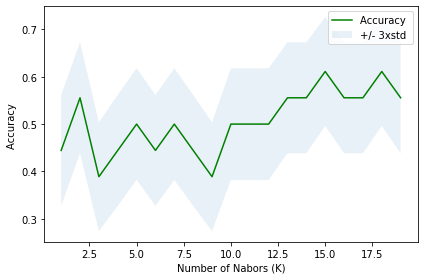

The best accuracy was with 0.6111111111111112 with k= 15


In [34]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

### Decision Tree <a name="decision_tree"></a>

Let's evaluate the decision tree classifier by testing with a depth of 4 to 10:

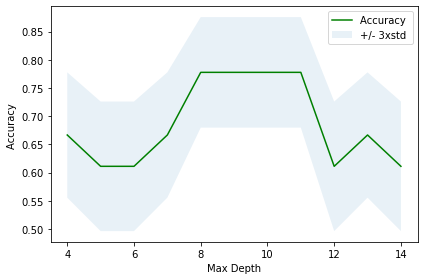

The best accuracy was with 0.7777777777777778 with max_depth= 8


In [35]:
max_depth = 15
mean_acc = np.zeros((max_depth-4))
std_acc = np.zeros((max_depth-4))
ConfustionMx = [];
for n in range(4,max_depth):
    DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    DecisionTree.fit(X_train,y_train)
    predTree = DecisionTree.predict(X_test)
    mean_acc[n-4] = metrics.accuracy_score(y_test, predTree)
    std_acc[n-4]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])
plt.plot(range(4,max_depth),mean_acc,'g')
plt.fill_between(range(4,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+4)

DecisionTrees's Accuracy:  0.7222222222222222


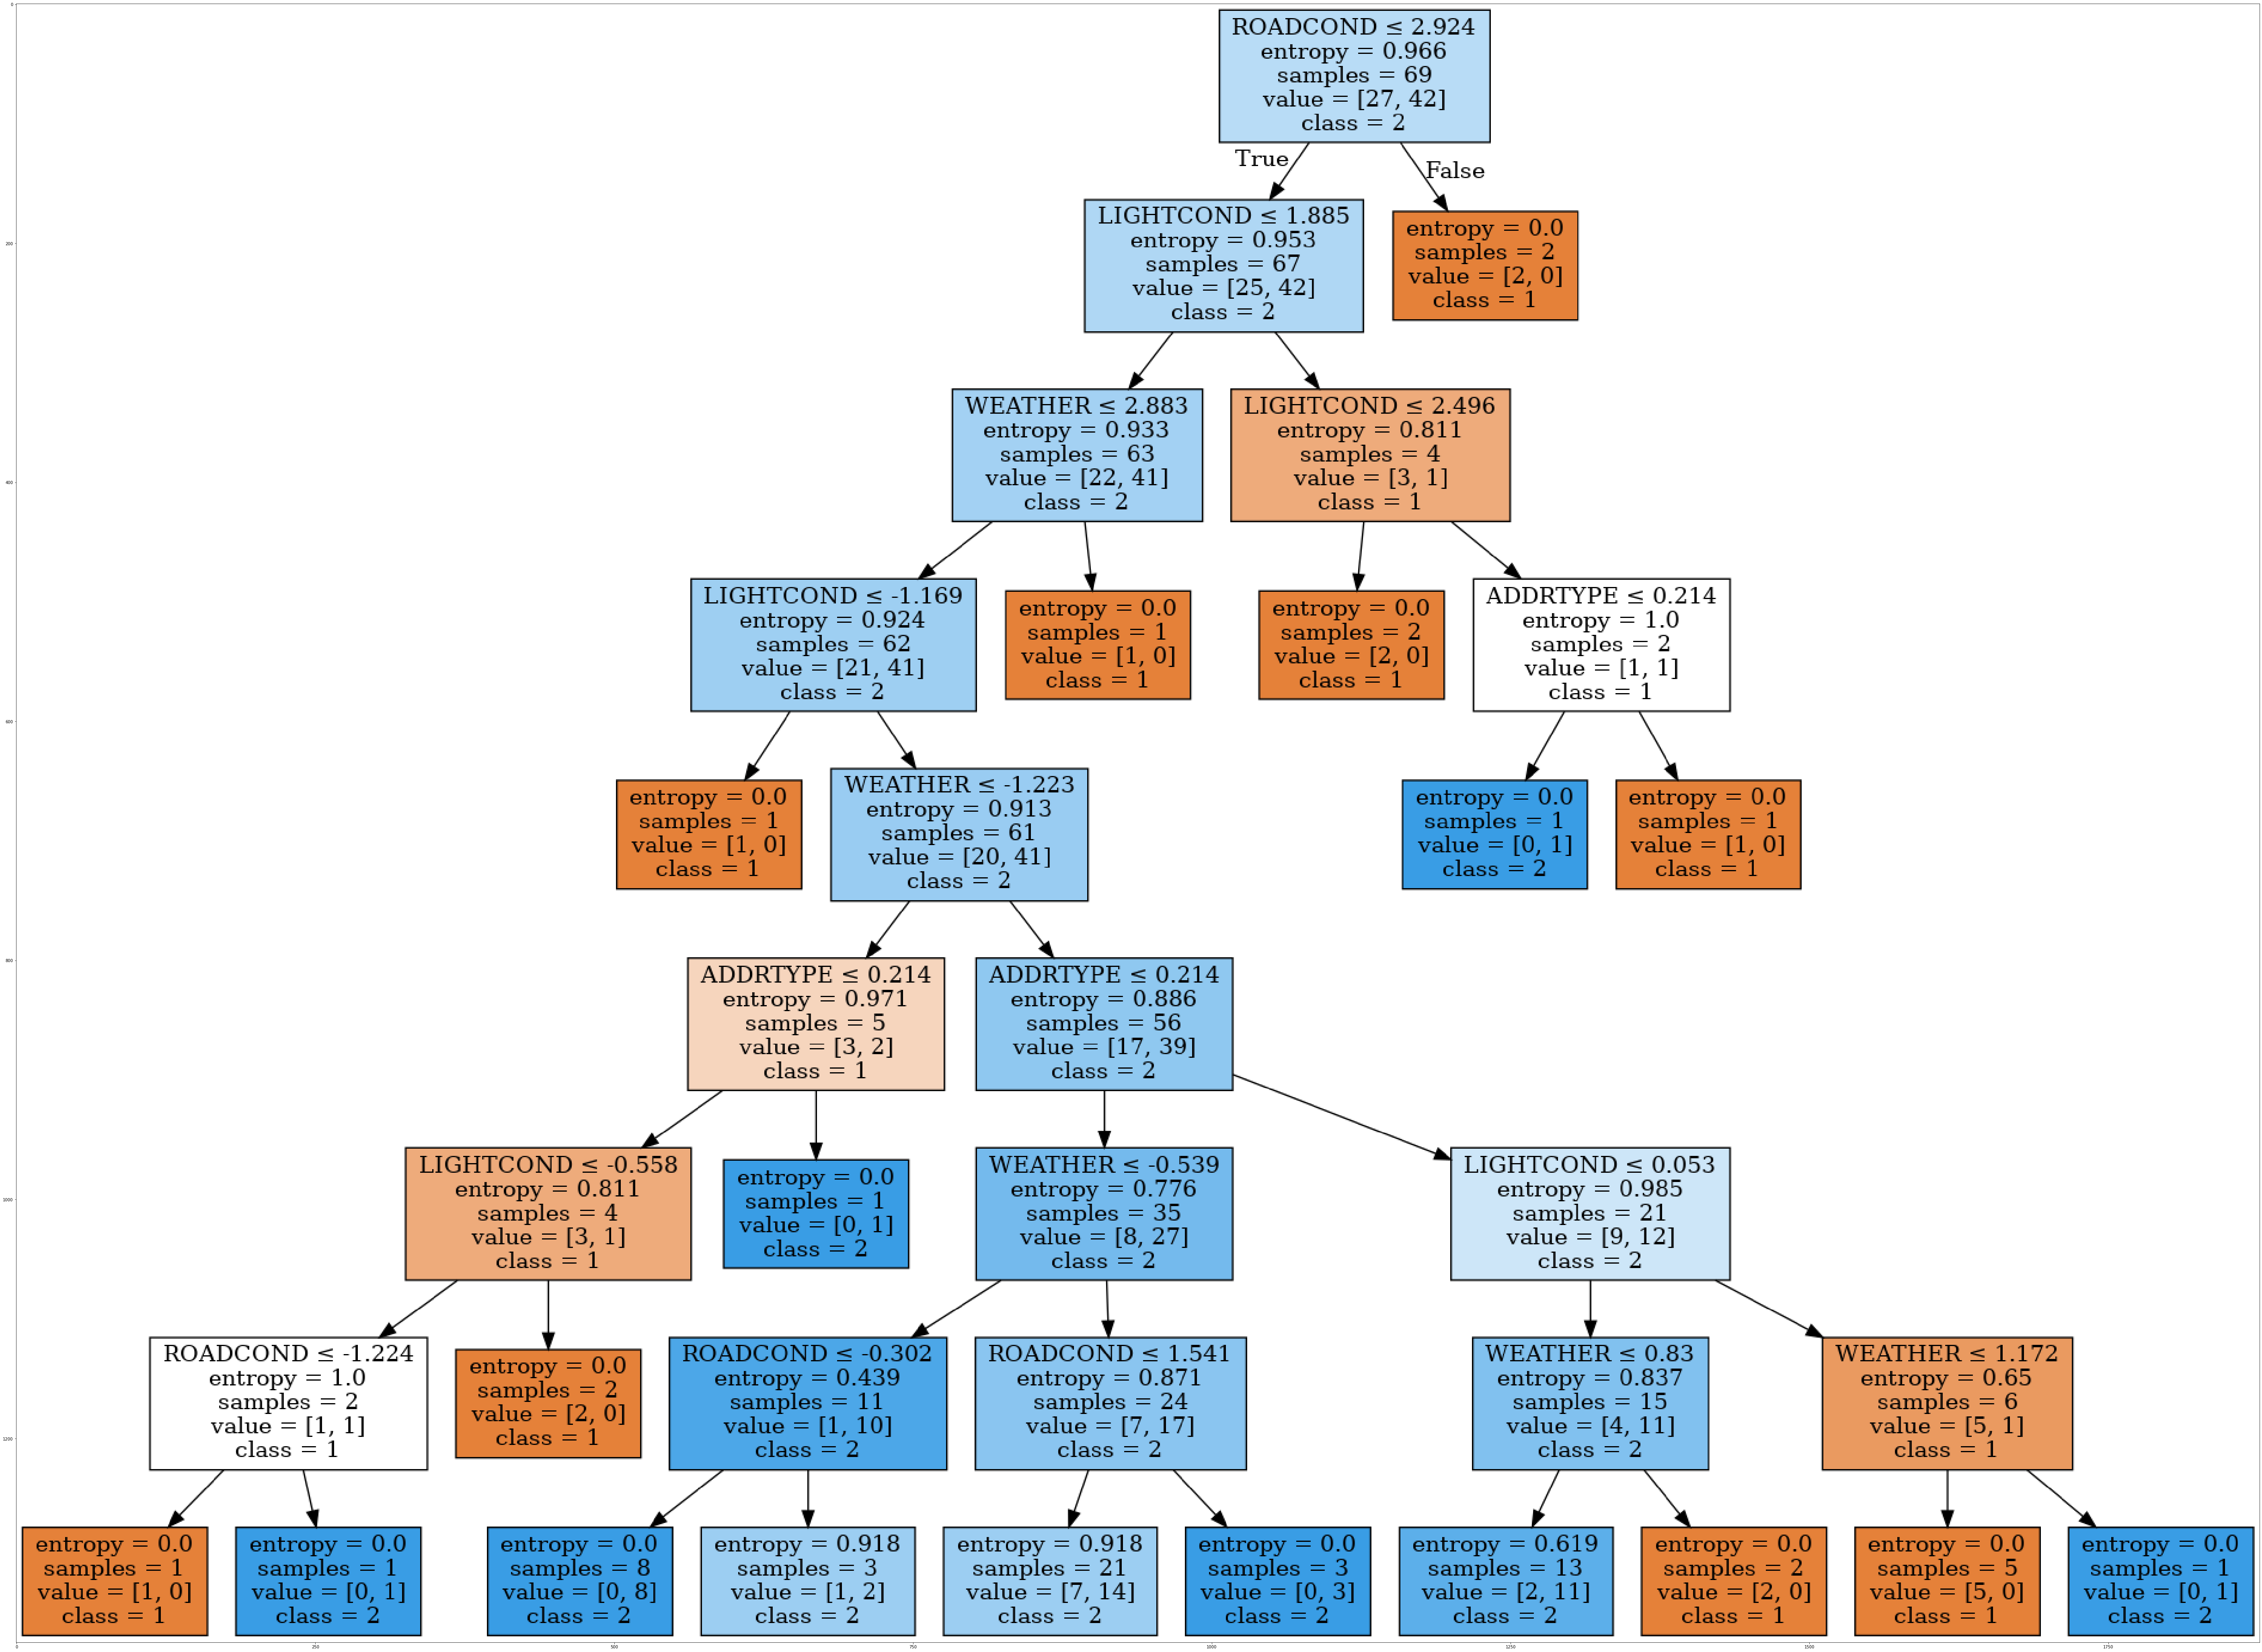

In [51]:
DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
DecisionTree.fit(X_train,y_train)
predTree = DecisionTree.predict(X_test)
dot_data = StringIO()
filename = "tree.png"
featureNames = ['ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']
targetNames = Feature['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(DecisionTree,feature_names=featureNames, out_file=dot_data, class_names= ['1','2'], filled=True, special_characters=True,rotate=False) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

### Support Vector Machine <a name="support_vector_machine"></a>

Let's evaluate the Support Vector Machine classifier usign the kernel RBF:

In [36]:
SupportVectorMachine = svm.SVC(kernel='rbf')
SupportVectorMachine.fit(X_train, y_train)
yhat = SupportVectorMachine.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Avg F1-score: 0.5786
Jaccard score: 0.6111


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.75      0.33      0.46         9
           2       0.57      0.89      0.70         9

   micro avg       0.61      0.61      0.61        18
   macro avg       0.66      0.61      0.58        18
weighted avg       0.66      0.61      0.58        18

Confusion matrix, without normalization
[[3 6]
 [1 8]]


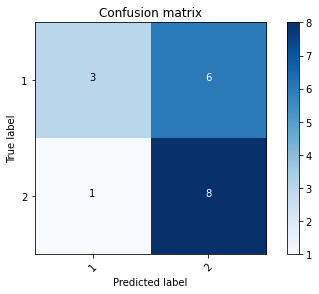

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

SupportVectorMachine_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(SupportVectorMachine_matrix, classes=[1,2], normalize= False,  title='Confusion matrix')

### Logistic Regression <a name="logistic_regression"></a>

Let's evaluate the Logistic Regression classifier usign the solver saga:

In [38]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.75      0.33      0.46         9
           2       0.57      0.89      0.70         9

   micro avg       0.61      0.61      0.61        18
   macro avg       0.66      0.61      0.58        18
weighted avg       0.66      0.61      0.58        18



Confusion matrix, without normalization
[[3 6]
 [1 8]]


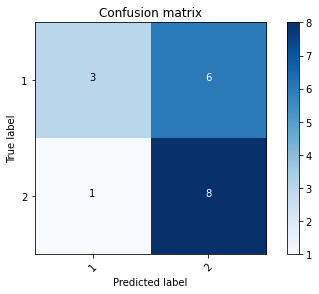

In [39]:
LR_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(LR_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

## Analysis <a name="analysis"></a>

We are going to compare the results obtained from the 4 classifiers:

In [40]:
# K Nearest Neighbor(KNN)
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train,y_train)
knn_yhat=neigh.predict(X_test)
knn_jaccard = jaccard_similarity_score(y_test, knn_yhat)
knn_f1 =f1_score(y_test, knn_yhat, average='weighted')

# Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dt.fit(X_train,y_train)
predTree = dt.predict(X_test)
dt_jaccard = jaccard_similarity_score(y_test, predTree)
dt_f1 = f1_score(y_test, predTree, average='weighted')

# Support Vector Machine
SupportVectorMachine = svm.SVC(kernel='rbf')
SupportVectorMachine.fit(X_train, y_train)
SupportVectorMachine_yhat = SupportVectorMachine.predict(X_test)
SupportVectorMachine_jaccard = jaccard_similarity_score(y_test, SupportVectorMachine_yhat)
SupportVectorMachine_f1 = f1_score(y_test, SupportVectorMachine_yhat, average='weighted')

# Logistic Regression
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
LR_jaccard = jaccard_similarity_score(y_test, LR_yhat)
LR_f1 = f1_score(y_test, LR_yhat, average='weighted')
LR_log_loss = log_loss(y_test, LR_yhat_prob)

data = {'Algorithm':  ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
        'Jaccard': [knn_jaccard, dt_jaccard, SupportVectorMachine_jaccard, LR_jaccard],
        'F1-score': [knn_f1, dt_f1, SupportVectorMachine_f1, LR_f1],
        'LogLoss': ['', '', '', LR_log_loss],
        }

report = pd.DataFrame (data, columns = ['Algorithm','Jaccard', 'F1-score', 'LogLoss'])
report

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.555556,0.446154,
1,Decision Tree,0.722222,0.714286,
2,SVM,0.611111,0.578595,
3,LogisticRegression,0.500000,0.333333,0.706093


## Results and Discussion <a name="results"></a>

The dataset used contained many null values, as well as duplicates, having to be drastically reduced.
Based on the results obtained, it can be observed that the Decision Tree classification algorithm is the one with the best results, allowing us to create a model that has acceptable precision despite the few data used.
The Support Vector Machine classification algorithm is second despite showing the same values in the confusion matrix as the Logistic Regression classification algorithm-
The K Nearest Neighbor ranking algorithm came in third place, but with very low results. 

## Conclusion <a name="conclusion"></a>

The data of the dataset used has not been recorded in an orderly and controlled manner, causing that there is not enough information to consider all circumstances. To solve this, it would be recommended to improve the registry of these and use the data from a longer period of time. According to the results obtained, we can see that the Decision Tree classification algorithm is the one with the best results, and given the nature of the data used, it can be seen that it best fits the objective to be achieved, since I will present it The more elements that affect the handling of a car, the greater the probability of having an accident. In production, the information provided to the model for the prediction should consider the limit values ​​('Y' and 'N') of the INATTENTIONIND, UNDERINFL and SPEEDING attributes, since these depend a lot on the behavior of the drivers at the time. . In addition, considering those of this may provide the user with a broader perspective of a possible accident and thus give him the opportunity to take action.